## Three Stock Monte

This exercise tests your ability to retrieve stock price data using the Alpaca API and simulate multiple portfolio compositions using Monte Carlo Simulation.

### Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get Past ~4 Year's Worth of Stock Price Data via Alpaca API Call

In [4]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 4 years ago.
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["T","NKE","XOM"]

# Get 4 year's worth of historical price data
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_ticker.head()

NKE                                       T  \
                             open    high     low   close   volume   open   
2015-05-01 00:00:00-04:00  49.940  50.410  49.705  50.385  5715970  34.56   
2015-05-04 00:00:00-04:00  50.500  50.600  50.242  50.410  3606368  34.41   
2015-05-05 00:00:00-04:00  50.215  50.435  50.130  50.205  3948804  34.49   
2015-05-06 00:00:00-04:00  50.135  50.500  25.010  50.125  4612302  33.71   
2015-05-07 00:00:00-04:00  25.005  50.795  25.005  50.730  4586904  33.25   

                                                             XOM         \
                            high    low   close    volume   open   high   
2015-05-01 00:00:00-04:00  34.72  34.13  34.420  28678372  87.85  88.95   
2015-05-04 00:00:00-04:00  34.71  34.25  34.530  18684532  89.42  89.88   
2015-05-05 00:00:00-04:00  34.58  33.66  33.720  29405889  89.97  90.09   
2015-05-06 00:00:00-04:00  33.79  33.08  33.395  27386910  89.65  89.96   
2015-05-07 00:00:00-04:00  33.56  33.11  33.370  19815760  88.00  88.10   

                                                    
                             low   close    volume  
2015-05-01 00:00:00-04:00  87.70  88.840  10232059  
2015-05-04 00:00:00-04:00  88.95  89.090   8023849  
2015-05-05 00:00:00-04:00  88.52  88.615   9605254  
2015-05-06 00:00:00-04:00  87.79  88.220   9280271  
2015-05-07 00:00:00-04:00  86.92  87.610   8034370

> Note: We're going to simulate five years of growth below, and so we might want to pull at least five years of data in order to do that. But we pulled four because of Alpaca's rate limits--we can only pull 1,000 rows at a time (approximately four years of data, with 252 tradable days per year). If we pull data with repeated calls in a `for` loop, however, we can get quite a few more years than what we've got above.  

### Simulate five year portfolio growth with evenly-distributed stock investments

In [5]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.33,.33,.33],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

NKE                                   \
                             open    high     low   close   volume   
2015-05-01 00:00:00-04:00  49.940  50.410  49.705  50.385  5715970   
2015-05-04 00:00:00-04:00  50.500  50.600  50.242  50.410  3606368   
2015-05-05 00:00:00-04:00  50.215  50.435  50.130  50.205  3948804   
2015-05-06 00:00:00-04:00  50.135  50.500  25.010  50.125  4612302   
2015-05-07 00:00:00-04:00  25.005  50.795  25.005  50.730  4586904   

                                            T                                  \
                          daily_return   open   high    low   close    volume   
2015-05-01 00:00:00-04:00          NaN  34.56  34.72  34.13  34.420  28678372   
2015-05-04 00:00:00-04:00     0.000496  34.41  34.71  34.25  34.530  18684532   
2015-05-05 00:00:00-04:00    -0.004067  34.49  34.58  33.66  33.720  29405889   
2015-05-06 00:00:00-04:00    -0.001593  33.71  33.79  33.08  33.395  27386910   
2015-05-07 00:00:00-04:00     0.012070  33.25  33.56  33.11  33.370  19815760   

                                          XOM                                  \
                          daily_return   open   high    low   close    volume   
2015-05-01 00:00:00-04:00          NaN  87.85  88.95  87.70  88.840  10232059   
2015-05-04 00:00:00-04:00     0.003196  89.42  89.88  88.95  89.090   8023849   
2015-05-05 00:00:00-04:00    -0.023458  89.97  90.09  88.52  88.615   9605254   
2015-05-06 00:00:00-04:00    -0.009638  89.65  89.96  87.79  88.220   9280271   
2015-05-07 00:00:00-04:00    -0.000749  88.00  88.10  86.92  87.610   8034370   

                                        
                          daily_return  
2015-05-01 00:00:00-04:00          NaN  
2015-05-04 00:00:00-04:00     0.002814  
2015-05-05 00:00:00-04:00    -0.005332  
2015-05-06 00:00:00-04:00    -0.004457  
2015-05-07 00:00:00-04:00    -0.006915

In [6]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005480,1.015210,1.007893,1.010729,1.010297,0.995405,1.009748,1.004034,1.010880,1.014896,...,0.991887,1.007724,0.982217,1.004653,1.002050,0.969126,0.977439,1.007538,0.971417,0.995136
2,1.020385,1.003846,1.007395,1.007104,1.030325,0.996135,0.999776,1.015460,1.003190,1.027387,...,1.008154,1.005291,0.977831,1.021975,0.978260,0.968938,0.991577,1.002256,0.982049,1.017720
3,1.022549,0.987443,0.999704,1.009697,1.021895,0.988429,0.978102,1.017867,1.024260,1.018934,...,1.026393,1.004898,0.969780,1.024680,0.979264,0.978388,1.011923,0.993583,1.005264,1.014733
4,1.035561,0.967801,0.973948,0.983884,1.015688,0.981954,0.990679,1.015950,1.010775,1.016142,...,1.025749,1.005136,0.991680,1.055564,0.981257,0.988491,1.042004,0.978167,1.003239,1.018125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.313767,1.534238,1.380014,1.431559,2.315487,0.962420,0.767698,1.414351,0.734502,0.605922,...,1.882286,0.760853,1.647839,1.790867,0.783797,2.292327,0.822993,0.826102,0.842988,1.237811
1257,2.316034,1.545920,1.371758,1.421039,2.315287,0.975926,0.768467,1.396676,0.730183,0.598129,...,1.917091,0.778528,1.661323,1.801069,0.795852,2.269343,0.808415,0.819679,0.851952,1.269680
1258,2.317729,1.553204,1.380637,1.435223,2.295635,0.965399,0.755572,1.408508,0.736391,0.608180,...,1.859163,0.783804,1.650720,1.781979,0.800902,2.288945,0.796015,0.811043,0.865836,1.294495
1259,2.338189,1.577024,1.388424,1.430545,2.289521,0.969963,0.769221,1.421862,0.724287,0.610580,...,1.837813,0.766496,1.642865,1.796835,0.806802,2.248813,0.803619,0.810447,0.878520,1.282982


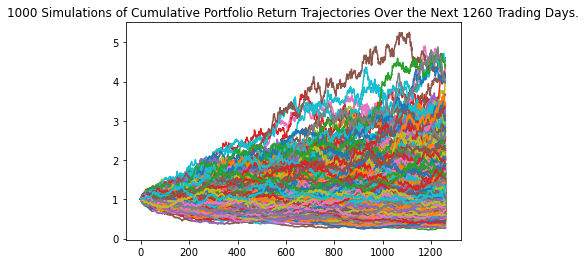

In [7]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

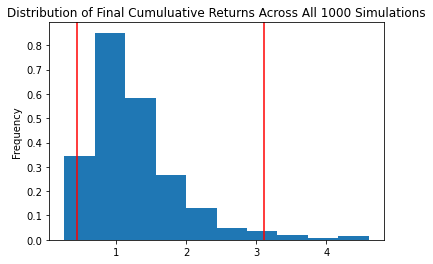

In [8]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [9]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               1.248977
std                0.654414
min                0.260045
25%                0.807732
50%                1.102806
75%                1.503041
max                4.605321
95% CI Lower       0.441835
95% CI Upper       3.108547
Name: 1260, dtype: float64


In [10]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
even_ci_lower = round(even_tbl[8]*15000,2)
even_ci_upper = round(even_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $6627.52 and $46628.21.


### Simulate five year portfolio growth with 60% AT&T stock

In [11]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 60% AT&T stock
MC_att = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.20,.60,.20],
    num_simulation = 1000,
    num_trading_days = 252*5)

# Print the simulation input data
MC_att.portfolio_data.head()

NKE                                   \
                             open    high     low   close   volume   
2015-05-01 00:00:00-04:00  49.940  50.410  49.705  50.385  5715970   
2015-05-04 00:00:00-04:00  50.500  50.600  50.242  50.410  3606368   
2015-05-05 00:00:00-04:00  50.215  50.435  50.130  50.205  3948804   
2015-05-06 00:00:00-04:00  50.135  50.500  25.010  50.125  4612302   
2015-05-07 00:00:00-04:00  25.005  50.795  25.005  50.730  4586904   

                                            T                                  \
                          daily_return   open   high    low   close    volume   
2015-05-01 00:00:00-04:00          NaN  34.56  34.72  34.13  34.420  28678372   
2015-05-04 00:00:00-04:00     0.000496  34.41  34.71  34.25  34.530  18684532   
2015-05-05 00:00:00-04:00    -0.004067  34.49  34.58  33.66  33.720  29405889   
2015-05-06 00:00:00-04:00    -0.001593  33.71  33.79  33.08  33.395  27386910   
2015-05-07 00:00:00-04:00     0.012070  33.25  33.56  33.11  33.370  19815760   

                                          XOM                                  \
                          daily_return   open   high    low   close    volume   
2015-05-01 00:00:00-04:00          NaN  87.85  88.95  87.70  88.840  10232059   
2015-05-04 00:00:00-04:00     0.003196  89.42  89.88  88.95  89.090   8023849   
2015-05-05 00:00:00-04:00    -0.023458  89.97  90.09  88.52  88.615   9605254   
2015-05-06 00:00:00-04:00    -0.009638  89.65  89.96  87.79  88.220   9280271   
2015-05-07 00:00:00-04:00    -0.000749  88.00  88.10  86.92  87.610   8034370   

                                        
                          daily_return  
2015-05-01 00:00:00-04:00          NaN  
2015-05-04 00:00:00-04:00     0.002814  
2015-05-05 00:00:00-04:00    -0.005332  
2015-05-06 00:00:00-04:00    -0.004457  
2015-05-07 00:00:00-04:00    -0.006915

In [12]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% AT&T stock
MC_att.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989831,0.998196,1.005977,0.990375,0.995479,0.998502,1.005326,1.022091,1.003910,0.986378,...,1.013035,1.027065,0.982041,1.006726,1.006596,0.999086,0.991117,1.007707,1.005065,0.990107
2,0.979803,1.016478,1.011543,0.989319,0.984806,1.003829,0.988352,1.029860,1.015851,0.986895,...,1.007466,1.053740,0.980818,1.011335,1.019885,0.992107,0.987612,1.012463,1.002547,0.970530
3,0.973500,1.015898,1.010066,0.980413,1.013453,0.986842,0.973513,1.036543,1.014453,0.992964,...,1.006375,1.067613,0.990138,1.047117,1.022676,1.009567,0.986420,1.027727,0.990293,0.968594
4,0.989427,1.023606,0.999972,0.990608,1.014647,0.991030,0.977589,1.037679,1.013827,0.992204,...,0.988456,1.072781,1.003826,1.081707,1.033008,1.016332,0.989714,1.019146,1.001347,0.975588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.587707,0.656317,0.541346,1.123234,0.738117,1.577428,0.714519,0.907725,0.537525,1.316987,...,1.339540,1.185190,0.497931,0.907479,0.966712,1.523544,1.260460,2.686498,0.763638,0.607454
1257,0.581145,0.651544,0.548252,1.138155,0.747151,1.549249,0.708382,0.917772,0.537777,1.350281,...,1.320387,1.194072,0.498734,0.880018,0.962250,1.514031,1.263554,2.683316,0.779538,0.606142
1258,0.578837,0.649668,0.547131,1.126496,0.751325,1.531988,0.711008,0.914255,0.543342,1.335386,...,1.334574,1.194292,0.505474,0.871175,0.976746,1.508826,1.260876,2.644063,0.779266,0.603611
1259,0.575644,0.638287,0.547279,1.101135,0.751146,1.523267,0.706263,0.912760,0.541770,1.333858,...,1.311842,1.174233,0.500623,0.873044,0.973944,1.503569,1.259236,2.686244,0.772869,0.604451


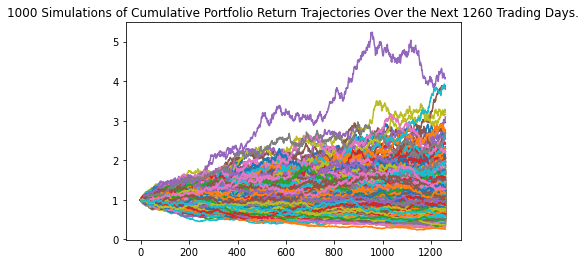

In [13]:
# Plot simulation outcomes
att_line_plot = MC_att.plot_simulation()

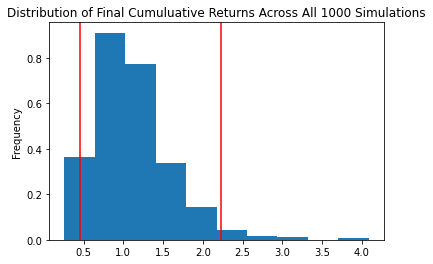

In [14]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_att.plot_distribution()

In [15]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_att.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count           1000.000000
mean               1.112001
std                0.484923
min                0.257586
25%                0.766251
50%                1.032711
75%                1.355419
max                4.086067
95% CI Lower       0.455660
95% CI Upper       2.227633
Name: 1260, dtype: float64


In [16]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,2)
att_ci_upper = round(att_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $6834.9 and $33414.49.


### Simulate five year portfolio growth with 60% Nike stock

In [17]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 60% Nike stock
MC_nike = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.20,.20],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Printing the simulation input data
MC_nike.portfolio_data.head()

NKE                                   \
                             open    high     low   close   volume   
2015-05-01 00:00:00-04:00  49.940  50.410  49.705  50.385  5715970   
2015-05-04 00:00:00-04:00  50.500  50.600  50.242  50.410  3606368   
2015-05-05 00:00:00-04:00  50.215  50.435  50.130  50.205  3948804   
2015-05-06 00:00:00-04:00  50.135  50.500  25.010  50.125  4612302   
2015-05-07 00:00:00-04:00  25.005  50.795  25.005  50.730  4586904   

                                            T                                  \
                          daily_return   open   high    low   close    volume   
2015-05-01 00:00:00-04:00          NaN  34.56  34.72  34.13  34.420  28678372   
2015-05-04 00:00:00-04:00     0.000496  34.41  34.71  34.25  34.530  18684532   
2015-05-05 00:00:00-04:00    -0.004067  34.49  34.58  33.66  33.720  29405889   
2015-05-06 00:00:00-04:00    -0.001593  33.71  33.79  33.08  33.395  27386910   
2015-05-07 00:00:00-04:00     0.012070  33.25  33.56  33.11  33.370  19815760   

                                          XOM                                  \
                          daily_return   open   high    low   close    volume   
2015-05-01 00:00:00-04:00          NaN  87.85  88.95  87.70  88.840  10232059   
2015-05-04 00:00:00-04:00     0.003196  89.42  89.88  88.95  89.090   8023849   
2015-05-05 00:00:00-04:00    -0.023458  89.97  90.09  88.52  88.615   9605254   
2015-05-06 00:00:00-04:00    -0.009638  89.65  89.96  87.79  88.220   9280271   
2015-05-07 00:00:00-04:00    -0.000749  88.00  88.10  86.92  87.610   8034370   

                                        
                          daily_return  
2015-05-01 00:00:00-04:00          NaN  
2015-05-04 00:00:00-04:00     0.002814  
2015-05-05 00:00:00-04:00    -0.005332  
2015-05-06 00:00:00-04:00    -0.004457  
2015-05-07 00:00:00-04:00    -0.006915

In [18]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% Nike stock
MC_nike.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.963042,1.040791,1.002721,0.964150,1.000517,0.993998,0.962085,1.014734,1.016982,0.999798,...,1.002140,0.980247,0.998225,1.035244,0.978538,1.013145,0.989505,0.966061,0.993958,1.007509
2,0.957529,1.014052,1.012356,0.970777,1.006766,0.977590,0.970551,0.997000,1.011805,0.979492,...,1.011363,0.984128,0.970797,1.074425,0.977221,1.019410,0.978388,0.938885,1.017364,1.010438
3,0.953151,1.029082,1.028926,0.958858,0.985568,0.989912,1.002328,1.034007,1.016512,0.956891,...,1.040663,1.010700,0.997690,1.100513,0.992319,1.045318,0.996885,0.911533,1.010276,1.024298
4,0.944651,1.059001,1.007120,0.963737,1.012732,1.027632,1.020508,1.061776,1.010396,0.927952,...,1.098608,1.005244,0.968915,1.114547,1.002711,1.050792,1.004159,0.930954,0.997637,1.024581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.459091,0.519497,1.023036,1.623797,2.215607,0.915767,1.027512,2.032724,4.079660,1.816010,...,0.693256,0.787556,1.267430,2.304676,1.231174,1.105560,2.099075,1.224171,2.989332,1.798352
1257,0.467586,0.520241,1.031733,1.587478,2.202436,0.892926,1.058745,2.060382,3.998700,1.747411,...,0.679729,0.807988,1.265599,2.367694,1.232401,1.079500,2.127825,1.227977,3.127229,1.823395
1258,0.467095,0.521372,1.021482,1.608136,2.203654,0.875355,1.118404,2.046532,3.965879,1.750738,...,0.650116,0.818997,1.231808,2.255807,1.218568,1.096072,2.083573,1.170714,3.110957,1.787381
1259,0.459442,0.529612,1.042673,1.583084,2.231881,0.849631,1.104355,2.149896,3.922887,1.787863,...,0.668105,0.809317,1.200473,2.265994,1.280890,1.105263,2.089086,1.142344,3.154486,1.792470


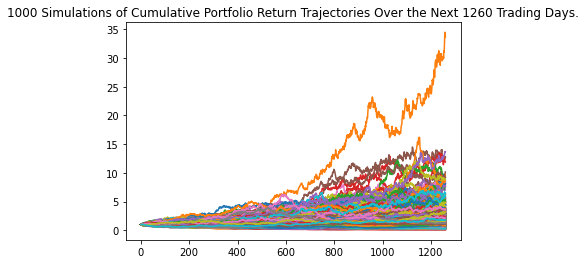

In [19]:
# Plot simulation outcomes
nike_line_plot = MC_nike.plot_simulation()

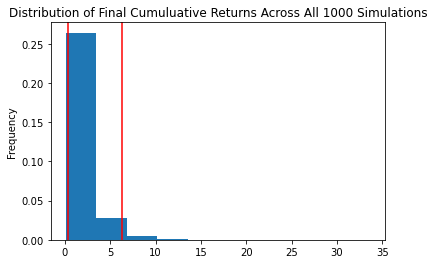

In [20]:
# Plot probability distribution and confidence intervals
nike_dist_plot = MC_nike.plot_distribution()

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
nike_tbl = MC_nike.summarize_cumulative_return()

# Print summary statistics
print(nike_tbl)

count           1000.000000
mean               1.849820
std                1.911183
min                0.102115
25%                0.800008
50%                1.391856
75%                2.258276
max               33.652304
95% CI Lower       0.310136
95% CI Upper       6.267054
Name: 1260, dtype: float64


In [22]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
nike_ci_lower = round(nike_tbl[8]*15000,2)
nike_ci_upper = round(nike_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${nike_ci_lower} and ${nike_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $4652.03 and $94005.81.


### Simulate five year portfolio growth with 60% Exxon stock

In [23]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_exxon = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.20,.20,.60],
    num_simulation = 1000,
    num_trading_days = 252*5)

# Printing the simulation input data
MC_exxon.portfolio_data

NKE                                   \
                             open    high     low   close   volume   
2015-05-01 00:00:00-04:00  49.940  50.410  49.705  50.385  5715970   
2015-05-04 00:00:00-04:00  50.500  50.600  50.242  50.410  3606368   
2015-05-05 00:00:00-04:00  50.215  50.435  50.130  50.205  3948804   
2015-05-06 00:00:00-04:00  50.135  50.500  25.010  50.125  4612302   
2015-05-07 00:00:00-04:00  25.005  50.795  25.005  50.730  4586904   
...                           ...     ...     ...     ...      ...   
2020-04-27 00:00:00-04:00  88.380  89.870  87.310  89.330  6204274   
2020-04-28 00:00:00-04:00  90.550  90.710  88.630  88.810  4483633   
2020-04-29 00:00:00-04:00  90.000  91.390  87.830  88.040  7944474   
2020-04-30 00:00:00-04:00  87.000  88.000  86.505  87.180  6528373   
2020-05-01 00:00:00-04:00  85.670  86.105  84.810  85.540  5357539   

                                            T                         \
                          daily_return   open   high     low   close   
2015-05-01 00:00:00-04:00          NaN  34.56  34.72  34.130  34.420   
2015-05-04 00:00:00-04:00     0.000496  34.41  34.71  34.250  34.530   
2015-05-05 00:00:00-04:00    -0.004067  34.49  34.58  33.660  33.720   
2015-05-06 00:00:00-04:00    -0.001593  33.71  33.79  33.080  33.395   
2015-05-07 00:00:00-04:00     0.012070  33.25  33.56  33.110  33.370   
...                                ...    ...    ...     ...     ...   
2020-04-27 00:00:00-04:00     0.010635  29.99  30.68  29.740  30.540   
2020-04-28 00:00:00-04:00    -0.005821  31.00  31.12  30.615  30.650   
2020-04-29 00:00:00-04:00    -0.008670  31.13  31.87  31.070  31.440   
2020-04-30 00:00:00-04:00    -0.009768  31.00  31.05  30.280  30.450   
2020-05-01 00:00:00-04:00    -0.018812  30.77  30.79  29.750  29.900   

                                                    XOM                        \
                             volume daily_return   open   high    low   close   
2015-05-01 00:00:00-04:00  28678372          NaN  87.85  88.95  87.70  88.840   
2015-05-04 00:00:00-04:00  18684532     0.003196  89.42  89.88  88.95  89.090   
2015-05-05 00:00:00-04:00  29405889    -0.023458  89.97  90.09  88.52  88.615   
2015-05-06 00:00:00-04:00  27386910    -0.009638  89.65  89.96  87.79  88.220   
2015-05-07 00:00:00-04:00  19815760    -0.000749  88.00  88.10  86.92  87.610   
...                             ...          ...    ...    ...    ...     ...   
2020-04-27 00:00:00-04:00  58376488     0.027937  43.59  44.32  42.23  43.920   
2020-04-28 00:00:00-04:00  55107142     0.003602  44.37  45.39  44.11  44.980   
2020-04-29 00:00:00-04:00  57547301     0.025775  46.26  47.60  46.16  47.480   
2020-04-30 00:00:00-04:00  63467447    -0.031489  47.68  47.68  45.77  46.400   
2020-05-01 00:00:00-04:00  69100348    -0.018062  45.63  46.39  43.00  43.170   

                                                  
                             volume daily_return  
2015-05-01 00:00:00-04:00  10232059          NaN  
2015-05-04 00:00:00-04:00   8023849     0.002814  
2015-05-05 00:00:00-04:00   9605254    -0.005332  
2015-05-06 00:00:00-04:00   9280271    -0.004457  
2015-05-07 00:00:00-04:00   8034370    -0.006915  
...                             ...          ...  
2020-04-27 00:00:00-04:00  26955553     0.004115  
2020-04-28 00:00:00-04:00  24393001     0.024135  
2020-04-29 00:00:00-04:00  26882843     0.055580  
2020-04-30 00:00:00-04:00  28454300    -0.022746  
2020-05-01 00:00:00-04:00  32688912    -0.069612  

[1260 rows x 18 columns]

In [24]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% Exxon stock
MC_exxon.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012365,1.005051,1.015545,1.021891,1.018308,0.987732,0.985629,1.002514,0.992336,0.979370,...,0.998771,0.979340,1.025950,0.996505,0.992540,1.026892,0.997323,0.990211,1.022771,0.994448
2,1.007012,1.031306,1.011611,1.016064,1.005896,0.988898,0.990685,1.015620,0.978801,0.983669,...,1.016266,1.000551,1.040112,0.993613,0.987034,1.024322,1.009411,0.988190,1.018663,1.000528
3,1.003818,1.029848,1.021082,1.010334,0.990183,0.998105,0.981482,1.016541,0.969181,0.994235,...,1.023726,1.003098,1.071499,0.987816,0.981761,1.033585,0.999732,0.974870,1.009913,1.011010
4,0.982035,1.023829,1.009410,1.005774,0.993700,0.974453,0.994293,1.013007,0.960548,0.998753,...,1.046310,0.981715,1.068962,0.969462,0.993796,1.047233,0.995176,0.985102,0.998913,1.006746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.840489,0.837059,1.302980,0.533810,0.924324,1.136846,0.984119,0.395403,0.711013,1.985686,...,1.322133,0.619735,0.757717,1.153693,1.308823,0.358552,0.951513,1.020156,1.226523,1.077556
1257,0.844111,0.835257,1.327750,0.524997,0.927139,1.137406,0.973180,0.389172,0.709526,1.960115,...,1.316934,0.613652,0.774217,1.145044,1.302847,0.360613,0.943299,1.035919,1.238049,1.063242
1258,0.834712,0.825747,1.313578,0.520079,0.929248,1.138228,1.007396,0.393105,0.711590,1.978595,...,1.340100,0.606727,0.770810,1.137440,1.293015,0.358477,0.944102,1.052590,1.235935,1.099814
1259,0.827069,0.810130,1.306712,0.520349,0.926828,1.135539,1.022436,0.399384,0.711157,1.967903,...,1.334956,0.614756,0.761785,1.136986,1.270369,0.356143,0.953215,1.056847,1.233811,1.094702


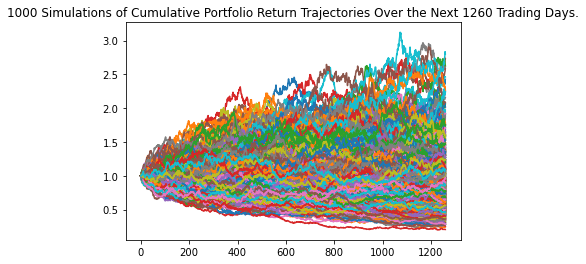

In [25]:
# Plot simulation outcomes
exxon_line_plot = MC_exxon.plot_simulation()

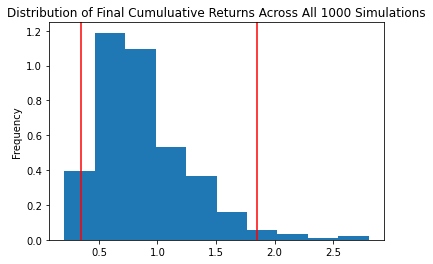

In [26]:
# Plot probability distribution and confidence intervals
exxon_dist_plot = MC_exxon.plot_distribution()

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
exxon_tbl = MC_exxon.summarize_cumulative_return()

# Print summary statistics
print(exxon_tbl)

count           1000.000000
mean               0.878161
std                0.395767
min                0.204487
25%                0.592225
50%                0.798627
75%                1.082379
max                2.803867
95% CI Lower       0.345626
95% CI Upper       1.849400
Name: 1260, dtype: float64


In [28]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
exxon_ci_lower = round(exxon_tbl[8]*15000,2)
exxon_ci_upper = round(exxon_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${exxon_ci_lower} and ${exxon_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $5184.4 and $27741.01.


### Summarize findings across all 4 simulations

In [29]:
# Even weighted stocks
print("Even weighted stocks")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")
print("*"*50)

# 60% for AT&T
print("60% for AT&T")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")
print("*"*50)

# 60% for Nike
print("60% for Nike")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${nike_ci_lower} and ${nike_ci_upper}.")
print("*"*50)

# 60% for Exxon
print("60% for Exxon")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${exxon_ci_lower} and ${exxon_ci_upper}.")
print("*"*50)

Even weighted stocks
There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $6627.52 and $46628.21.
**************************************************
60% for AT&T
There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $6834.9 and $33414.49.
**************************************************
60% for Nike
There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $4652.03 and $94005.81.
**************************************************
60% for Exxon
There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $5184.4 and $27741.01.
**************************************************


Looking across all four simulations, the portfolio breakdown with the greatest chance of success looks to be the portfolio with a majority of Nike stock. Although all four portfolios have a chance to lose money, the Nike portfolio is roughly the same level of risk with far more upside potential.